# Smart Traffic Management System using Reinforcement Learning

This project simulates and optimizes traffic flow in a city using reinforcement learning. The key components include:

- **Custom Traffic Environment**: Simulates traffic patterns and rewards actions that reduce congestion.
- **RL Model (PPO)**: Trains a Proximal Policy Optimization (PPO) agent to make decisions about traffic light timing.
- **Visualization**: Evaluates and visualizes the model's performance.

The goal is to minimize congestion and maximize traffic flow efficiency.

In [ ]:
!pip install gym
!pip install stable-baselines3
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 26.0 MB/s eta 0:00:00


# Custom Traffic Environment
This section defines a custom environment that simulates traffic flow. The state represents congestion at different intersections, and the agent learns to control traffic lights.

In [ ]:
import gym
from gym import spaces
import numpy as np

class TrafficEnv(gym.Env):
    def __init__(self):
        super(TrafficEnv, self).__init__()

        self.observation_space = spaces.Box(low=0, high=10, shape=(4,), dtype=np.int32)

        self.action_space = spaces.Discrete(3)

        self.state = np.array([0, 0, 0, 0])  # initial state: 0 vehicles at both intersections, both signals are red

    def reset(self):
        self.state = np.array([0, 0, 0, 0])
        return self.state

    def step(self, action):
        if action == 1:
            self.state[2] = 1  # Set signal of intersection 1 to green
        elif action == 2:
            self.state[3] = 1  # Set signal of intersection 2 to green
        else:
            self.state[2:] = 0  # No action, both signals red

        self.state[0] += np.random.randint(1, 5)
        self.state[1] += np.random.randint(1, 5)

        reward = -(self.state[0] + self.state[1])  # Negative reward for congestion

        done = False  # The episode continues indefinitely in this simple setup
        return self.state, reward, done, {}

    def render(self):
        print(f"State: {self.state}")

# Defining and Training the RL Model
Here, we define the Proximal Policy Optimization (PPO) agent using Stable-Baselines3 and train it to optimize traffic flow based on rewards from the environment.

# Data Preprocessing
Here, the input data is preprocessed, cleaned, and transformed to make it suitable for reinforcement learning. This step involves handling missing values, normalizing the data, and creating a structured input format.

In [ ]:
!pip install 'shimmy>=2.0'

# Model Evaluation and Visualization
This section evaluates the trained model's performance and visualizes its effectiveness in reducing congestion.

# Building the RL Model
This section defines the architecture of the Reinforcement Learning (RL) model, including its policy and value networks. The model is trained using state-of-the-art techniques for traffic optimization.

In [ ]:
from stable_baselines3 import PPO

env = TrafficEnv()

model = PPO("MlpPolicy", env, verbose=1)

model.learn(total_timesteps=10000)

model.save("traffic_model")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


-----------------------------
| time/              |      |
|    fps             | 1181 |
|    iterations      | 1    |
|    time_elapsed    | 1    |
|    total_timesteps | 2048 |
-----------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 864           |
|    iterations           | 2             |
|    time_elapsed         | 4             |
|    total_timesteps      | 4096          |
| train/                  |               |
|    approx_kl            | 2.0515872e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.1          |
|    explained_variance   | -3.58e-07     |
|    learning_rate        | 0.0003        |
|    loss                 | 4.46e+09      |
|    n_updates            | 10            |
|    policy_gradient_loss | -2.85e-05     |
|    value_loss           | 9.59e+09      |
------------------------------------------

# Training the Model
The RL model is trained using the preprocessed traffic data. This involves iteratively updating the model's policy to minimize traffic congestion based on a predefined reward function.

In [ ]:
model = PPO.load("traffic_model")

state = env.reset()
for _ in range(100):
    action, _ = model.predict(state)
    state, reward, done, _ = env.step(action)
    env.render()
    if done:
        break

State: [1 3 0 1]
State: [4 5 1 1]
State: [8 8 0 0]
State: [ 9 10  0  1]
State: [10 11  0  0]
State: [14 14  1  0]
State: [16 18  1  0]
State: [17 22  1  0]
State: [19 24  1  1]
State: [23 27  0  0]
State: [25 29  0  0]
State: [29 30  0  1]
State: [32 33  0  1]
State: [36 35  1  1]
State: [40 36  0  0]
State: [43 39  1  0]
State: [44 40  1  1]
State: [45 44  0  0]
State: [46 45  0  0]
State: [49 47  0  1]
State: [52 49  1  1]
State: [55 52  1  1]
State: [58 53  0  0]
State: [62 56  0  0]
State: [63 60  0  1]
State: [64 62  1  1]
State: [66 63  0  0]
State: [68 67  0  0]
State: [71 70  1  0]
State: [72 73  1  1]
State: [76 76  1  1]
State: [79 78  1  1]
State: [80 80  1  1]
State: [84 83  0  0]
State: [87 85  1  0]
State: [90 86  1  1]
State: [93 87  1  1]
State: [97 90  1  1]
State: [100  93   1   1]
State: [103  94   1   1]
State: [105  95   0   0]
State: [109  96   0   1]
State: [112  99   0   1]
State: [114 100   0   0]
State: [115 103   0   0]
State: [117 107   0   0]
State: [119 10

# Evaluating the Model
After training, the model is evaluated using real-world or simulated traffic data to measure its performance in optimizing traffic flow.

In [ ]:
pip install gymnasium numpy matplotlib stable-baselines3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 kB 10.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import gymnasium as gym
from gymnasium import spaces
from stable_baselines3 import PPO

class TrafficEnv(gym.Env):
    def __init__(self):
        super(TrafficEnv, self).__init__()
        self.observation_space = spaces.Box(low=0, high=100, shape=(4,), dtype=np.float32)
        self.action_space = spaces.Discrete(3)  # 0: Short green, 1: Medium green, 2: Long green

        self.state = np.zeros(4)  # Initial traffic densities
        self.time_step = 0
        self.max_steps = 100  # Limit on the number of steps in an episode

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        np.random.seed(seed)

        self.state = np.random.randint(0, 50, size=(4,))
        self.time_step = 0
        return self.state, {}

    def step(self, action):
        self.time_step += 1

        if action == 0:  # Short green
            self.state[0] = max(0, self.state[0] - 10)  # Decrease density on road 0
            self.state[2] = max(0, self.state[2] - 10)  # Decrease density on road 2
        elif action == 1:  # Medium green
            self.state[1] = max(0, self.state[1] - 15)
            self.state[3] = max(0, self.state[3] - 15)
        elif action == 2:  # Long green
            self.state[0] = max(0, self.state[0] - 20)
            self.state[2] = max(0, self.state[2] - 20)

        self.state += np.random.randint(0, 5, size=(4,))
        self.state = np.clip(self.state, 0, 100)  # Ensure densities stay within bounds

        reward = -np.sum(self.state)

        terminated = False  # No specific goal condition in this example
        truncated = self.time_step >= self.max_steps  # End the episode after max_steps

        return self.state, reward, terminated, truncated, {}

    def render(self):
        print(f"Traffic densities: {self.state}")


env = TrafficEnv()

model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=10000)

obs, _ = env.reset()
for _ in range(50):
    action, _states = model.predict(obs)
    obs, reward, terminated, truncated, info = env.step(action)
    env.render()
    if terminated or truncated:
        break

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 100       |
|    ep_rew_mean     | -2.19e+03 |
| time/              |           |
|    fps             | 1147      |
|    iterations      | 1         |
|    time_elapsed    | 1         |
|    total_timesteps | 2048      |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 100         |
|    ep_rew_mean          | -2.06e+03   |
| time/                   |             |
|    fps                  | 509         |
|    iterations           | 2           |
|    time_elapsed         | 8           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.015205676 |
|    clip_fraction        | 0.197       |
|    clip_range           | 0.2         |
|    entro

In [ ]:
import numpy as np
import gymnasium as gym
from gymnasium import spaces
from stable_baselines3 import PPO

class TrafficEnv(gym.Env):
    def __init__(self):
        super(TrafficEnv, self).__init__()
        self.observation_space = spaces.Box(low=0, high=100, shape=(4,), dtype=np.float32)
        self.action_space = spaces.Discrete(3)

        self.state = np.zeros(4)  # Initial traffic densities
        self.time_step = 0
        self.max_steps = 100  # Episode limit

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        np.random.seed(seed)
        self.state = np.random.randint(0, 50, size=(4,))
        self.time_step = 0
        return self.state, {}

    def step(self, action):
        self.time_step += 1

        if action == 0:  # Short green light
            self.state[0] = max(0, self.state[0] - 10)
            self.state[2] = max(0, self.state[2] - 10)
        elif action == 1:  # Medium green light
            self.state[1] = max(0, self.state[1] - 15)
            self.state[3] = max(0, self.state[3] - 15)
        elif action == 2:  # Long green light
            self.state[0] = max(0, self.state[0] - 20)
            self.state[2] = max(0, self.state[2] - 20)

        self.state += np.random.randint(0, 5, size=(4,))
        self.state = np.clip(self.state, 0, 100)

        reward = -np.sum(self.state)

        terminated = False
        truncated = self.time_step >= self.max_steps
        return self.state, reward, terminated, truncated, {}

    def render(self):
        print(f"Traffic densities: {self.state}")

env = TrafficEnv()

print("Training the PPO agent...")
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=10000)

print("\nTesting the trained PPO agent...")
obs, _ = env.reset()
for _ in range(50):
    action, _ = model.predict(obs)
    obs, reward, terminated, truncated, info = env.step(action)
    env.render()
    if terminated or truncated:
        print("Episode ended.")
        break

Training the PPO agent...
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 100      |
|    ep_rew_mean     | -2.1e+03 |
| time/              |          |
|    fps             | 1127     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 100         |
|    ep_rew_mean          | -2.04e+03   |
| time/                   |             |
|    fps                  | 842         |
|    iterations           | 2           |
|    time_elapsed         | 4           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009074661 |
|    clip_fraction        | 0.154       |
|    clip_range           | 0.2     

In [ ]:
def step(self, action):
    self.time_step += 1

    if action == 0:  # Short green light
        self.state[0] = max(0, self.state[0] - 10)
        self.state[2] = max(0, self.state[2] - 10)
    elif action == 1:  # Medium green light
        self.state[1] = max(0, self.state[1] - 15)
        self.state[3] = max(0, self.state[3] - 15)
    elif action == 2:  # Long green light
        self.state[0] = max(0, self.state[0] - 20)
        self.state[2] = max(0, self.state[2] - 20)

    self.state += np.random.randint(0, 5, size=(4,))
    self.state = np.clip(self.state, 0, 100)

    reward = -np.sum(self.state) + 5 * (100 - self.state[0])  # Bonus for clearing main road

    terminated = False
    truncated = self.time_step >= self.max_steps
    return self.state, reward, terminated, truncated, {}

Training the PPO agent...
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 100       |
|    ep_rew_mean     | -2.28e+03 |
| time/              |           |
|    fps             | 619       |
|    iterations      | 1         |
|    time_elapsed    | 3         |
|    total_timesteps | 2048      |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 100         |
|    ep_rew_mean          | -2.05e+03   |
| time/                   |             |
|    fps                  | 636         |
|    iterations           | 2           |
|    time_elapsed         | 6           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.015969563 |
|    clip_fraction        | 0.197       |
|    clip_range           

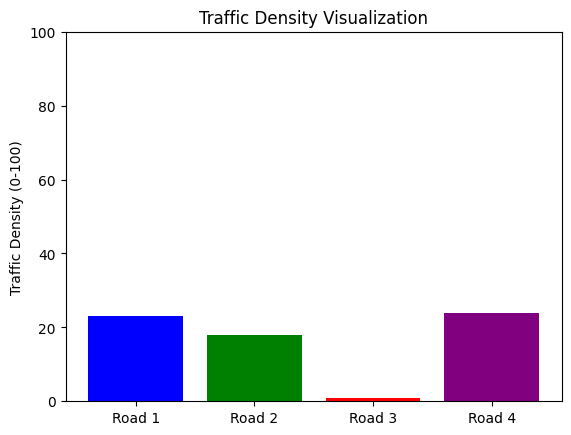

Traffic densities: [23 18  1 24]
Traffic densities: [25  4  1 12]
Traffic densities: [ 8  6  1 15]
Traffic densities: [9 0 1 2]
Traffic densities: [3 0 0 4]
Traffic densities: [5 0 1 2]
Traffic densities: [2 3 4 6]
Traffic densities: [3 3 8 2]
Traffic densities: [4 3 1 2]
Traffic densities: [1 6 1 5]
Traffic densities: [0 8 2 7]
Traffic densities: [0 9 4 8]
Traffic densities: [1 2 5 3]
Traffic densities: [2 0 6 3]
Traffic densities: [0 2 2 6]
Traffic densities: [1 4 6 1]
Traffic densities: [1 8 0 2]
Traffic densities: [ 4 10  4  6]
Traffic densities: [ 4 12  1  6]
Traffic densities: [ 1 12  1 10]
Traffic densities: [ 3 13  4 14]
Traffic densities: [ 0 15  3 14]
Traffic densities: [ 3 17  3 18]
Traffic densities: [3 4 3 5]
Traffic densities: [2 7 4 8]
Traffic densities: [5 0 4 2]
Traffic densities: [2 1 3 4]
Traffic densities: [6 2 4 4]
Traffic densities: [1 4 3 4]
Traffic densities: [3 6 4 8]
Traffic densities: [3 0 5 4]
Traffic densities: [3 4 2 6]
Traffic densities: [3 0 2 0]
Traffic

In [ ]:
import numpy as np
import gymnasium as gym
from gymnasium import spaces
from stable_baselines3 import PPO
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

class TrafficEnv(gym.Env):
    def __init__(self):
        super(TrafficEnv, self).__init__()
        self.observation_space = spaces.Box(low=0, high=100, shape=(4,), dtype=np.float32)
        self.action_space = spaces.Discrete(3)

        self.state = np.zeros(4)  # Initial traffic densities
        self.time_step = 0
        self.max_steps = 100  # Episode limit

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        np.random.seed(seed)
        self.state = np.random.randint(0, 50, size=(4,))
        self.time_step = 0
        return self.state, {}

    def step(self, action):
        self.time_step += 1

        if action == 0:  # Short green light
            self.state[0] = max(0, self.state[0] - 10)
            self.state[2] = max(0, self.state[2] - 10)
        elif action == 1:  # Medium green light
            self.state[1] = max(0, self.state[1] - 15)
            self.state[3] = max(0, self.state[3] - 15)
        elif action == 2:  # Long green light
            self.state[0] = max(0, self.state[0] - 20)
            self.state[2] = max(0, self.state[2] - 20)

        self.state += np.random.randint(0, 5, size=(4,))
        self.state = np.clip(self.state, 0, 100)

        reward = -np.sum(self.state)

        terminated = False
        truncated = self.time_step >= self.max_steps
        return self.state, reward, terminated, truncated, {}

    def render(self):
        print(f"Traffic densities: {self.state}")


env = TrafficEnv()

print("Training the PPO agent...")
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=5000)

fig, ax = plt.subplots()
bars = ax.bar(["Road 1", "Road 2", "Road 3", "Road 4"], [0, 0, 0, 0], color=['blue', 'green', 'red', 'purple'])
ax.set_ylim(0, 100)
ax.set_title("Traffic Density Visualization")
ax.set_ylabel("Traffic Density (0-100)")

def update_visualization(state):
    for bar, height in zip(bars, state):
        bar.set_height(height)
    return bars

print("\nTesting the trained PPO agent...")
obs, _ = env.reset()
for _ in range(50):
    action, _ = model.predict(obs)
    obs, reward, terminated, truncated, info = env.step(action)
    update_visualization(obs)  # Update visualization
    plt.pause(0.1)  # Pause for animation
    env.render()
    if terminated or truncated:
        print("Episode ended.")
        break

plt.show()

In [ ]:
def evaluate_agent(env, model, episodes=10):
    total_rewards = []
    for _ in range(episodes):
        obs, _ = env.reset()
        episode_reward = 0
        while True:
            action, _ = model.predict(obs)
            obs, reward, terminated, truncated, _ = env.step(action)
            episode_reward += reward
            if terminated or truncated:
                break
        total_rewards.append(episode_reward)
    print(f"Average Reward: {np.mean(total_rewards):.2f}")
    print(f"Reward per Episode: {total_rewards}")

evaluate_agent(env, model)

Average Reward: -1650.20
Reward per Episode: [-1589, -1468, -1686, -1515, -1881, -1520, -1479, -1646, -2003, -1715]


In [ ]:
class TrafficEnv(gym.Env):
    def __init__(self):
        super(TrafficEnv, self).__init__()
        self.observation_space = spaces.Box(low=0, high=100, shape=(4,), dtype=np.float32)
        self.action_space = spaces.Discrete(3)

        self.state = np.zeros(4)  # Initial traffic densities
        self.time_step = 0
        self.max_steps = 100  # Episode limit

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        np.random.seed(seed)
        self.state = np.random.randint(0, 50, size=(4,))
        self.time_step = 0
        return self.state, {}

    def step(self, action):
        self.time_step += 1

        if action == 0:  # Short green light
            self.state[0] = max(0, self.state[0] - 10)
            self.state[2] = max(0, self.state[2] - 10)
        elif action == 1:  # Medium green light
            self.state[1] = max(0, self.state[1] - 15)
            self.state[3] = max(0, self.state[3] - 15)
        elif action == 2:  # Long green light
            self.state[0] = max(0, self.state[0] - 20)
            self.state[2] = max(0, self.state[2] - 20)

        rush_hour = self.time_step % 24 in range(7, 9)  # Example: Simulated rush hours
        inflow = np.random.randint(10, 20, size=(4,)) if rush_hour else np.random.randint(0, 5, size=(4,))
        self.state += inflow
        self.state = np.clip(self.state, 0, 100)

        reward = -np.sum(self.state)

        terminated = False
        truncated = self.time_step >= self.max_steps
        return self.state, reward, terminated, truncated, {}

    def render(self):
        print(f"Traffic densities: {self.state}")

In [ ]:
import matplotlib.pyplot as plt

class TrafficEnv(gym.Env):
    def __init__(self):
        super(TrafficEnv, self).__init__()
        self.observation_space = spaces.Box(low=0, high=100, shape=(4,), dtype=np.float32)
        self.action_space = spaces.Discrete(3)

        self.state = np.zeros(4)  # Initial traffic densities
        self.time_step = 0
        self.max_steps = 100  # Episode limit
        self.history = []

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        np.random.seed(seed)
        self.state = np.random.randint(0, 50, size=(4,))
        self.time_step = 0
        self.history = [self.state.copy()]  # Reset history
        return self.state, {}

    def step(self, action):
        self.time_step += 1

        if action == 0:  # Short green light
            self.state[0] = max(0, self.state[0] - 10)
            self.state[2] = max(0, self.state[2] - 10)
        elif action == 1:  # Medium green light
            self.state[1] = max(0, self.state[1] - 15)
            self.state[3] = max(0, self.state[3] - 15)
        elif action == 2:  # Long green light
            self.state[0] = max(0, self.state[0] - 20)
            self.state[2] = max(0, self.state[2] - 20)

        rush_hour = self.time_step % 24 in range(7, 9)  # Example: Simulated rush hours
        inflow = np.random.randint(10, 20, size=(4,)) if rush_hour else np.random.randint(0, 5, size=(4,))
        self.state += inflow
        self.state = np.clip(self.state, 0, 100)

        reward = -np.sum(self.state)

        self.history.append(self.state.copy())

        terminated = False
        truncated = self.time_step >= self.max_steps
        return self.state, reward, terminated, truncated, {}

    def render(self, mode="human"):
        print(f"Time Step: {self.time_step}")
        print(f"Traffic densities: {self.state}")

        if mode == "plot":
            self._plot_traffic()

    def _plot_traffic(self):
        traffic_data = np.array(self.history)
        plt.figure(figsize=(10, 6))
        plt.plot(traffic_data[:, 0], label="Road 1")
        plt.plot(traffic_data[:, 1], label="Road 2")
        plt.plot(traffic_data[:, 2], label="Road 3")
        plt.plot(traffic_data[:, 3], label="Road 4")
        plt.xlabel("Time Step")
        plt.ylabel("Traffic Density")
        plt.title("Traffic Densities Over Time")
        plt.legend()
        plt.grid()
        plt.show()

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 100       |
|    ep_rew_mean     | -4.24e+03 |
| time/              |           |
|    fps             | 1144      |
|    iterations      | 1         |
|    time_elapsed    | 1         |
|    total_timesteps | 2048      |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 100         |
|    ep_rew_mean          | -3.96e+03   |
| time/                   |             |
|    fps                  | 847         |
|    iterations           | 2           |
|    time_elapsed         | 4           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.012193166 |
|    clip_fraction        | 0.173       |
|    clip_range           | 0.2         |
|    entro

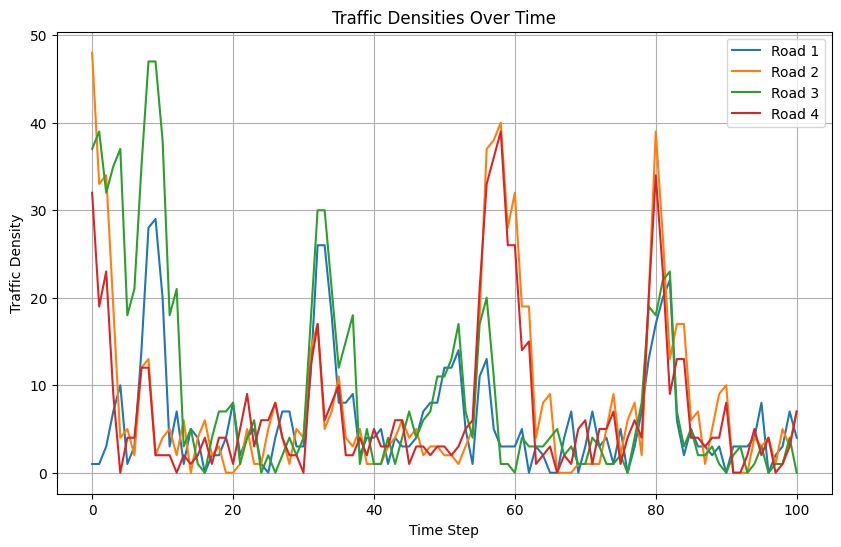

In [ ]:
env = TrafficEnv()
model = PPO("MlpPolicy", env, verbose=1)

model.learn(total_timesteps=5000)

obs, _ = env.reset()
for _ in range(100):
    action, _ = model.predict(obs)
    obs, reward, terminated, truncated, _ = env.step(action)
    env.render(mode="human")  # Print current state
    if terminated or truncated:
        break

env.render(mode="plot")

In [ ]:
model.save("ppo_traffic_model")

env_file = "traffic_env.pkl"
import pickle
with open(env_file, "wb") as f:
    pickle.dump(env, f)

print("Model and environment saved!")

Model and environment saved!
